In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import math
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.path import Path
x_label_size = 24
y_label_size = 24
label_size = 24
legend_size = 20
act_xticks = np.arange(1, 21, 4)
rl_xticks = np.arange(0.34, 0.75, 0.1)
figsize = (9, 9)
actr_labels = ['skill','round', 'goal_rate', 'entropy_n']
rl_labels = ['round', 'goal_rate', 'entropy_n']
base_tau = 0.35
division_rate = 50
# rewards = [i for i in range(1, 21)]
# actr_xlist = [i for i in range(1, 21)]
rewards = [2, 6, 10, 14, 18]
actr_xlist = [2, 6, 10, 14, 18]
rl_xlist = [round(base_tau + (i-1)/division_rate,2) for i in range(1, 21, 1)]

In [2]:
from collections import namedtuple
Lim = namedtuple('Lim', ('min','max'))

In [3]:
def LoadCsvWithMapSize(csv_names):
    df = pd.DataFrame(index=None)
    for csv_name in csv_names:
        df_csv = pd.read_csv(csv_name[0])
        df_csv['map_size'] = [csv_name[1]] * len(df_csv)
        df = df.append(df_csv)
            
    return df

In [4]:
def draw_conventional_graph(df, ax, color, label,x_list, rewards, col_name, map_size,map_no_min, map_no_max, sd_rate, ylim):
    group = df.groupby(["map_size", 'reward'])
    df_mean = group.mean()
    y_list = []
    ax.grid()
    
    for reward in rewards:
        m = df_mean.loc[map_size, reward].at[col_name]
        y_list.append(m)
    y_each_map_sd_mean = calc_each_map_sd_mean(df, map_size, map_no_min, map_no_max, rewards, col_name, sd_rate)
    ax.errorbar(x_list, y_list, yerr = y_each_map_sd_mean, color=color, label=label, capsize=3)
    
    ax.set_ylim(ylim)

In [5]:
def calc_each_map_sd_mean(df, map_size, map_no_min, map_no_max, rewards, col_name, sd_rate):
    sd_mean = []
    group_sd = df.groupby(["map_size", 'map_no', 'reward']).std()
    map_num = map_no_max - map_no_min + 1
    for reward in rewards:
        sd_sum = 0
        for map_no in range(map_no_min, map_num):
            sd_sum += group_sd.loc[map_size, map_no, reward].at[col_name]
        sd_mean.append(sd_sum / map_num * sd_rate)
    return sd_mean

In [6]:
def draw_actr_graphs(df, axes, labels, x_list, rewards, colors, levels, names, ylims):
    for ax, label, ylim in zip(axes, labels, ylims):
        for l, c, n in zip(levels, colors, names):
            draw_conventional_graph(df, ax, c, n, x_list, rewards, label, l,0, 9, 1.0/10, ylim)
            ax.tick_params(labelsize=24)    
            ax.legend(fontsize=32)

In [7]:
def LoadCsvWithMapSizeAndModelNumber(csv_name, map_size, model_number):
    df_csv = pd.read_csv(csv_name)
    df_csv['map_size'] = [map_size] * len(df_csv)
    df_csv['mode_number'] = [model_number] * len(df_csv)
            
    return df_csv

In [8]:
i_11_11 = "instance_ct_11_11_10_2_4_5_180.csv"
i_9_9 = "instance_ct_9_9_10_2_4_5_180.csv"
i_7_7 = "instance_ct_7_7_10_2_4_5_180.csv"

b_11_11 = "backtrack_ct_11_11_10_2_4_5_180.csv"
b_9_9 = "backtrack_ct_9_9_10_2_4_5_180.csv"
b_7_7 = "backtrack_ct_7_7_10_2_4_5_180.csv"

r_11_11 = "random_n_11_11_10_2_4_5_180.csv"
r_9_9 = "random_n_9_9_10_2_4_5_180.csv"
r_7_7 = "random_n_7_7_10_2_4_5_180.csv"

df_i = LoadCsvWithMapSize([(i_11_11, 3), (i_9_9, 2), (i_7_7, 1)])
df_b = LoadCsvWithMapSize([(b_11_11, 3), (b_9_9, 2), (b_7_7, 1)])
df_r = LoadCsvWithMapSize([(r_11_11, 3), (r_9_9, 2), (r_7_7, 1)])

In [9]:
fig = plt.figure(figsize=(10 * 4,10 * 4))

<Figure size 2880x2880 with 0 Axes>

In [10]:
colors = ['#FF8888', '#AA5555', '#552222']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[100, 1000], [2,100], [0, 1.01], [0.65,0.9]]
axes = [fig.add_subplot(4, 4, 1), fig.add_subplot(4, 4, 5), fig.add_subplot(4, 4, 9), fig.add_subplot(4, 4, 13)]
axes[0].set_yscale('log')
axes[1].set_yscale('log')
draw_actr_graphs(df_i, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

In [11]:
colors = ['#88FF88', '#55AA55', '#225522']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[100, 1000], [2,100], [0, 1.01], [0.65,0.9]]
axes = [fig.add_subplot(4, 4, 2), fig.add_subplot(4, 4, 6), fig.add_subplot(4, 4, 10), fig.add_subplot(4, 4, 14)]
axes[0].set_yscale('log')
axes[1].set_yscale('log')
draw_actr_graphs(df_b, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

In [12]:
colors = ['#8888FF', '#5555AA', '#222255']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[100, 1000], [2,100], [0, 1.01], [0.65,0.9]]
axes = [fig.add_subplot(4, 4, 3), fig.add_subplot(4, 4, 7), fig.add_subplot(4, 4, 11), fig.add_subplot(4, 4, 15)]
axes[0].set_yscale('log')
axes[1].set_yscale('log')
draw_actr_graphs(df_r, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

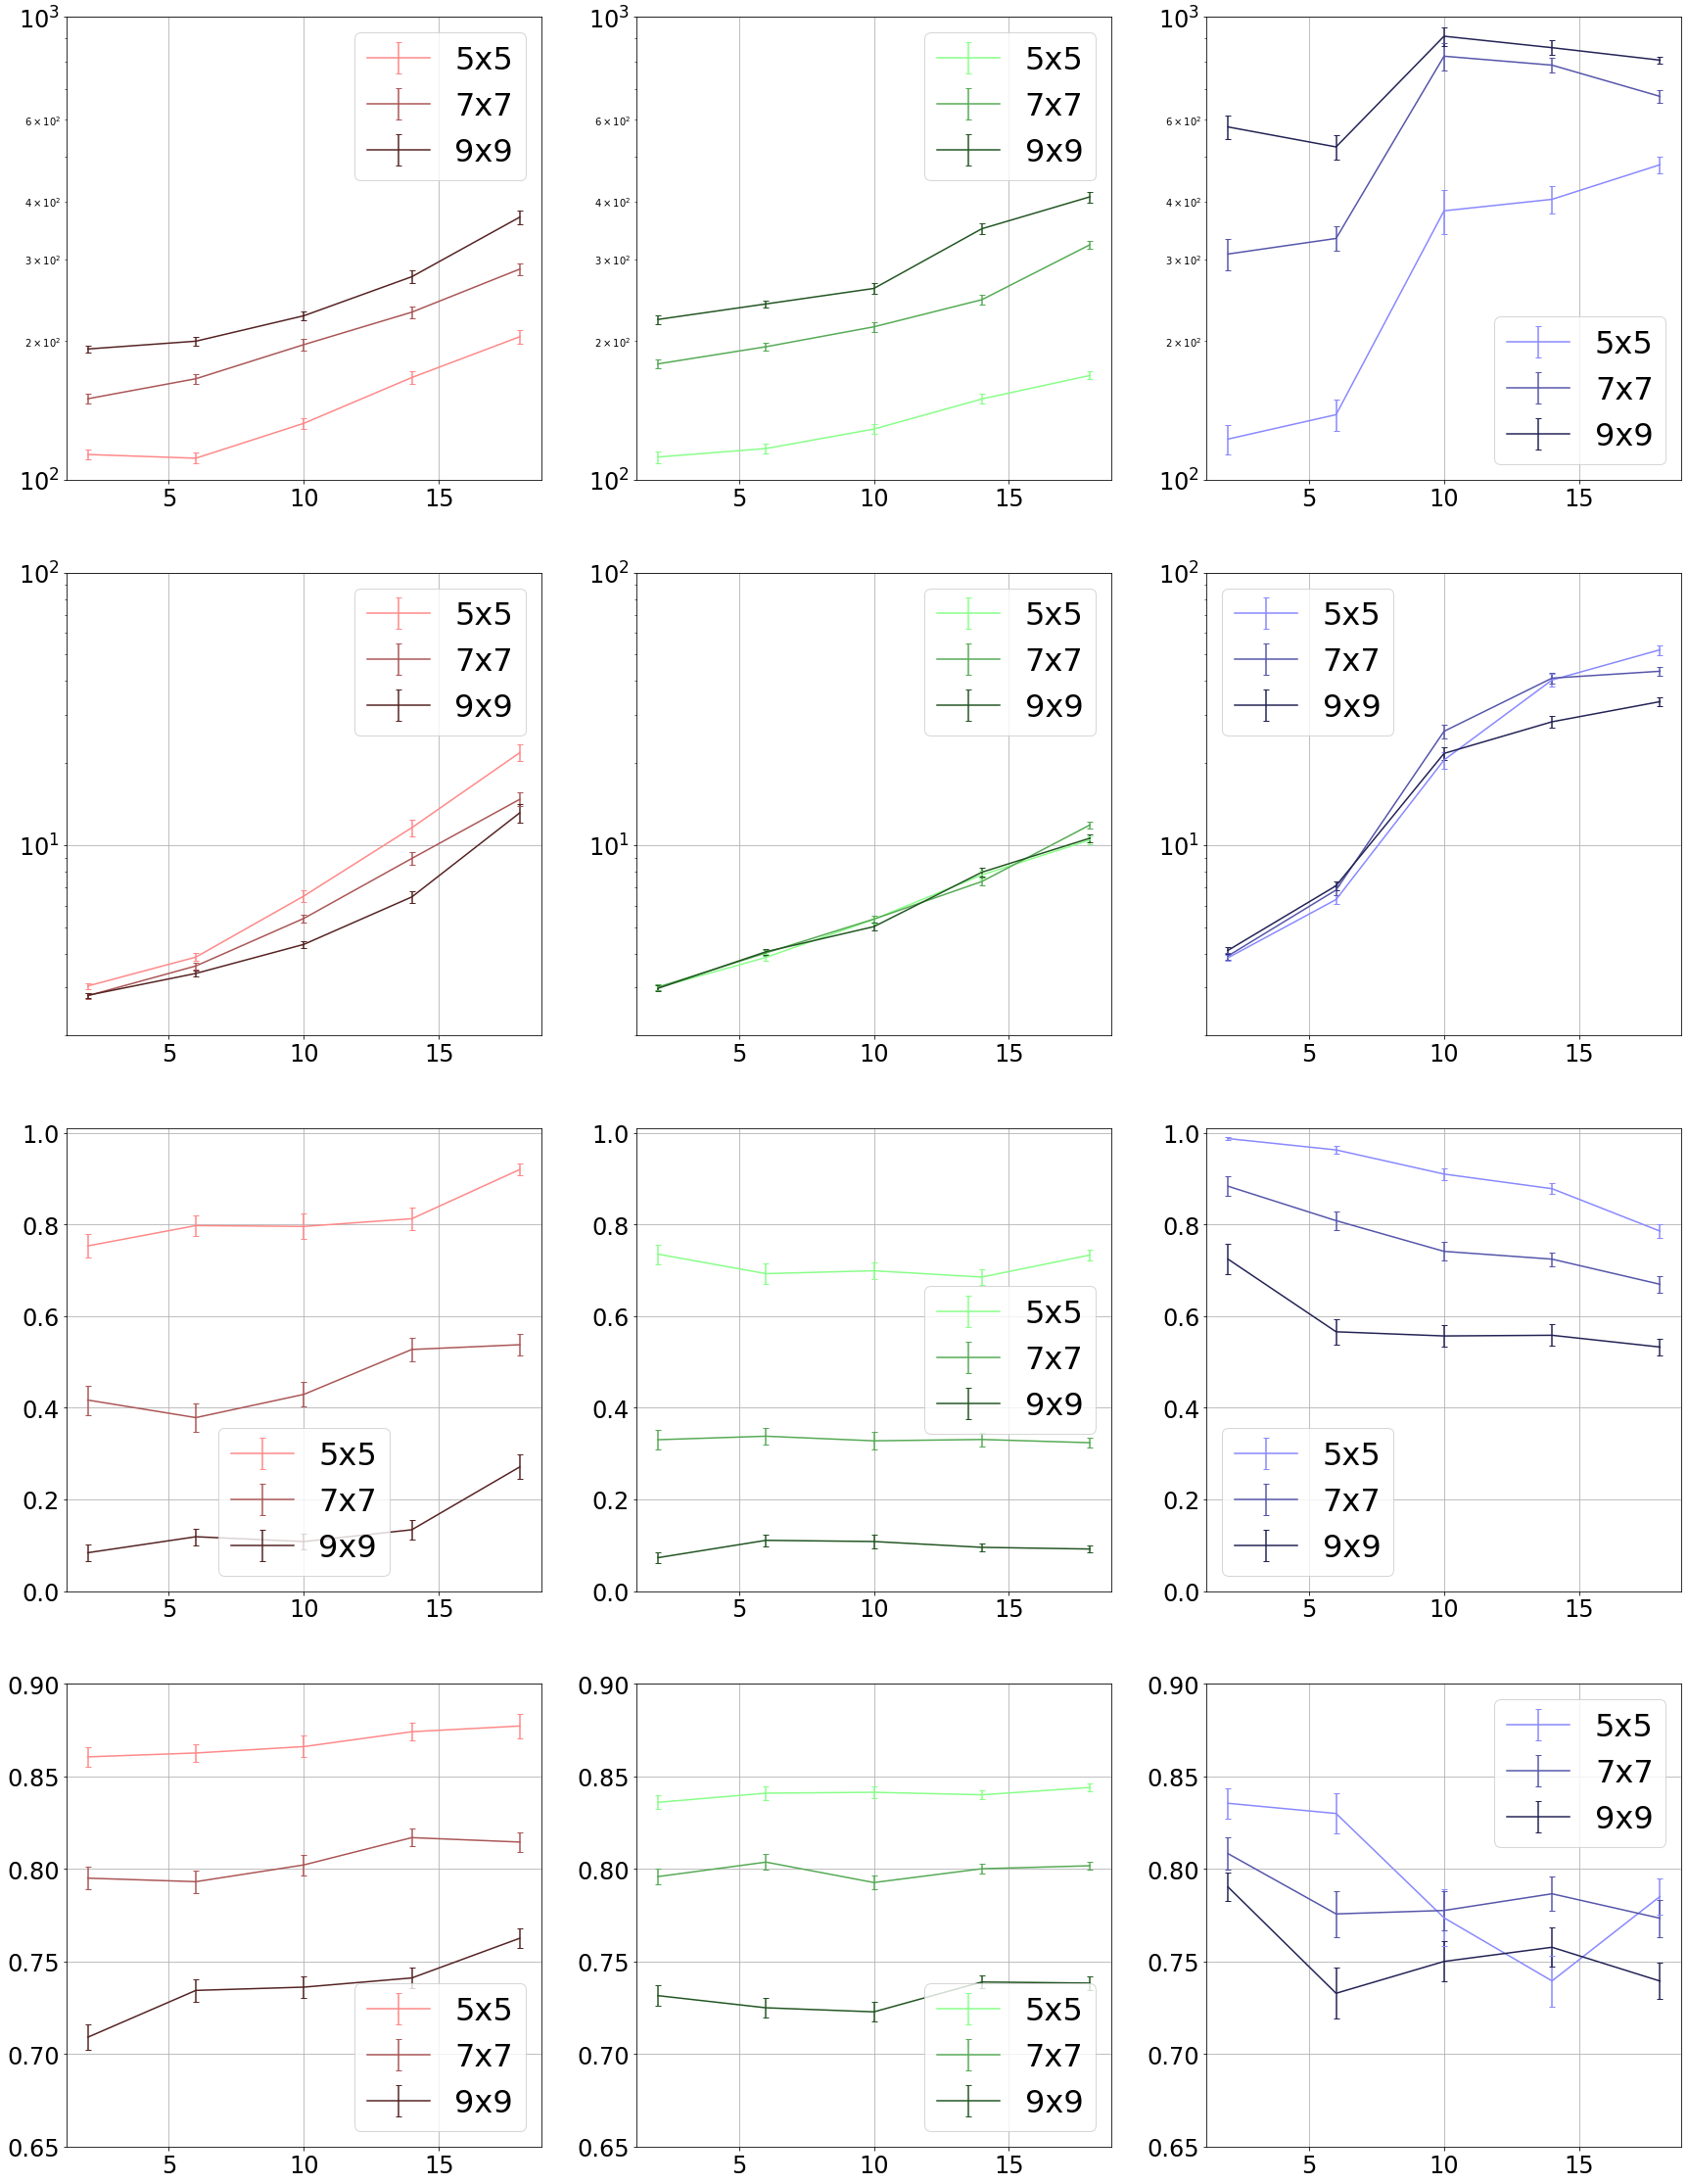

In [13]:
display(fig)

In [14]:
csv_names = [
             i_11_11,
             i_9_9,
             i_7_7,
             b_11_11,
             b_9_9,
             b_7_7,
             r_11_11,
             r_9_9,
             r_7_7]
map_sizes = [1, 2, 3, 1, 2, 3, 1, 2, 3]
model_numbers = [3, 3, 3, 2, 2, 2, 1, 1, 1]

df = pd.DataFrame(index=[])
for csv_name, map_size, model_number in zip(csv_names, map_sizes, model_numbers):
    df = df.append(LoadCsvWithMapSizeAndModelNumber(csv_name, map_size, model_number))
df = df.drop(columns=['entropy', 'probability', 'path', 'map_no', 'giveup_time', 'achivenmt_time', 'goal_time'])

df_r = df[df['mode_number'] == 1].drop(columns=['mode_number'])
df_b = df[df['mode_number'] == 2].drop(columns=['mode_number'])
df_i = df[df['mode_number'] == 3].drop(columns=['mode_number'])

df_r.to_csv('df_r.csv')
df_b.to_csv('df_b.csv')
df_i.to_csv('df_i.csv')

In [15]:
rewards = [i for i in range(1, 21, 1)]
actr_xlist = [i for i in range(1, 21, 1)]

i_11_11 = "iresult_11_11_1000_1_20_100.csv"
i_9_9 = "iresult_9_9_1000_1_20_100.csv"
i_7_7 = "iresult_7_7_1000_1_20_100.csv"

b_11_11 = "bresult_11_11_1000_1_20_100.csv"
b_9_9 = "bresult_9_9_1000_1_20_100.csv"
b_7_7 = "bresult_7_7_1000_1_20_100.csv"

r_11_11 = "rresult_11_11_1000_1_20_100.csv"
r_9_9 = "rresult_9_9_1000_1_20_100.csv"
r_7_7 = "rresult_7_7_1000_1_20_100.csv"

rl_11_11 = "rl_result_11_11_10000_1_20_100_0.35_50.csv"
rl_9_9 = "rl_result_9_9_10000_1_20_100_0.35_50.csv"
rl_7_7 = "rl_result_7_7_10000_1_20_100_0.35_50.csv"

df_i = LoadCsvWithMapSize([(i_11_11, 3), (i_9_9, 2), (i_7_7, 1)])
df_b = LoadCsvWithMapSize([(b_11_11, 3), (b_9_9, 2), (b_7_7, 1)])
df_r = LoadCsvWithMapSize([(r_11_11, 3), (r_9_9, 2), (r_7_7, 1)])
df_rl = LoadCsvWithMapSize([(rl_11_11, 3), (rl_9_9, 2), (rl_7_7, 1)])

In [16]:
fig = plt.figure(figsize=(10 * 4,10 * 4))

<Figure size 2880x2880 with 0 Axes>

In [17]:
colors = ['#FF8888', '#AA5555', '#552222']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[1,100], [0, 0.65], [0.35,0.9], [12, 95]]
axes = [fig.add_subplot(4, 4, 1), fig.add_subplot(4, 4, 5), fig.add_subplot(4, 4, 9), fig.add_subplot(4, 4, 13)]
axes[0].set_yscale('log')
draw_actr_graphs(df_i, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

In [18]:
colors = ['#88FF88', '#55AA55', '#225522']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[1,100], [0, 0.65], [0.35,0.9], [12, 95]]
axes = [fig.add_subplot(4, 4, 2), fig.add_subplot(4, 4, 6), fig.add_subplot(4, 4, 10), fig.add_subplot(4, 4, 14)]
axes[0].set_yscale('log')
draw_actr_graphs(df_b, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

In [19]:
colors = ['#8888FF', '#5555AA', '#222255']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[1,100],[0, 0.65], [0.35,0.9], [12, 95]]
axes = [fig.add_subplot(4, 4, 3), fig.add_subplot(4, 4, 7), fig.add_subplot(4, 4, 11), fig.add_subplot(4, 4, 15)]
axes[0].set_yscale('log')
draw_actr_graphs(df_r, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

In [20]:
level = [1, 2, 3]
color = ['#FF8888', '#AA5555', '#552222']
name = ['5x5', '7x7', '9x9']
df = df_rl
ylims =[[1,100],[0, 0.65], [0.35,0.9]]
axes = [fig.add_subplot(4, 4, 4), fig.add_subplot(4, 4, 8), fig.add_subplot(4, 4, 12)]
axes[0].set_yscale('log')
for ax, label, ylim in zip(axes, rl_labels, ylims):
    for l, c, n in zip(level, color, name):
        draw_conventional_graph(df, ax, c, n, rl_xlist, rewards, label, l,0, 9, 1.0/10, ylim)
        ax.tick_params(labelsize=24)    
        ax.legend(fontsize=32)

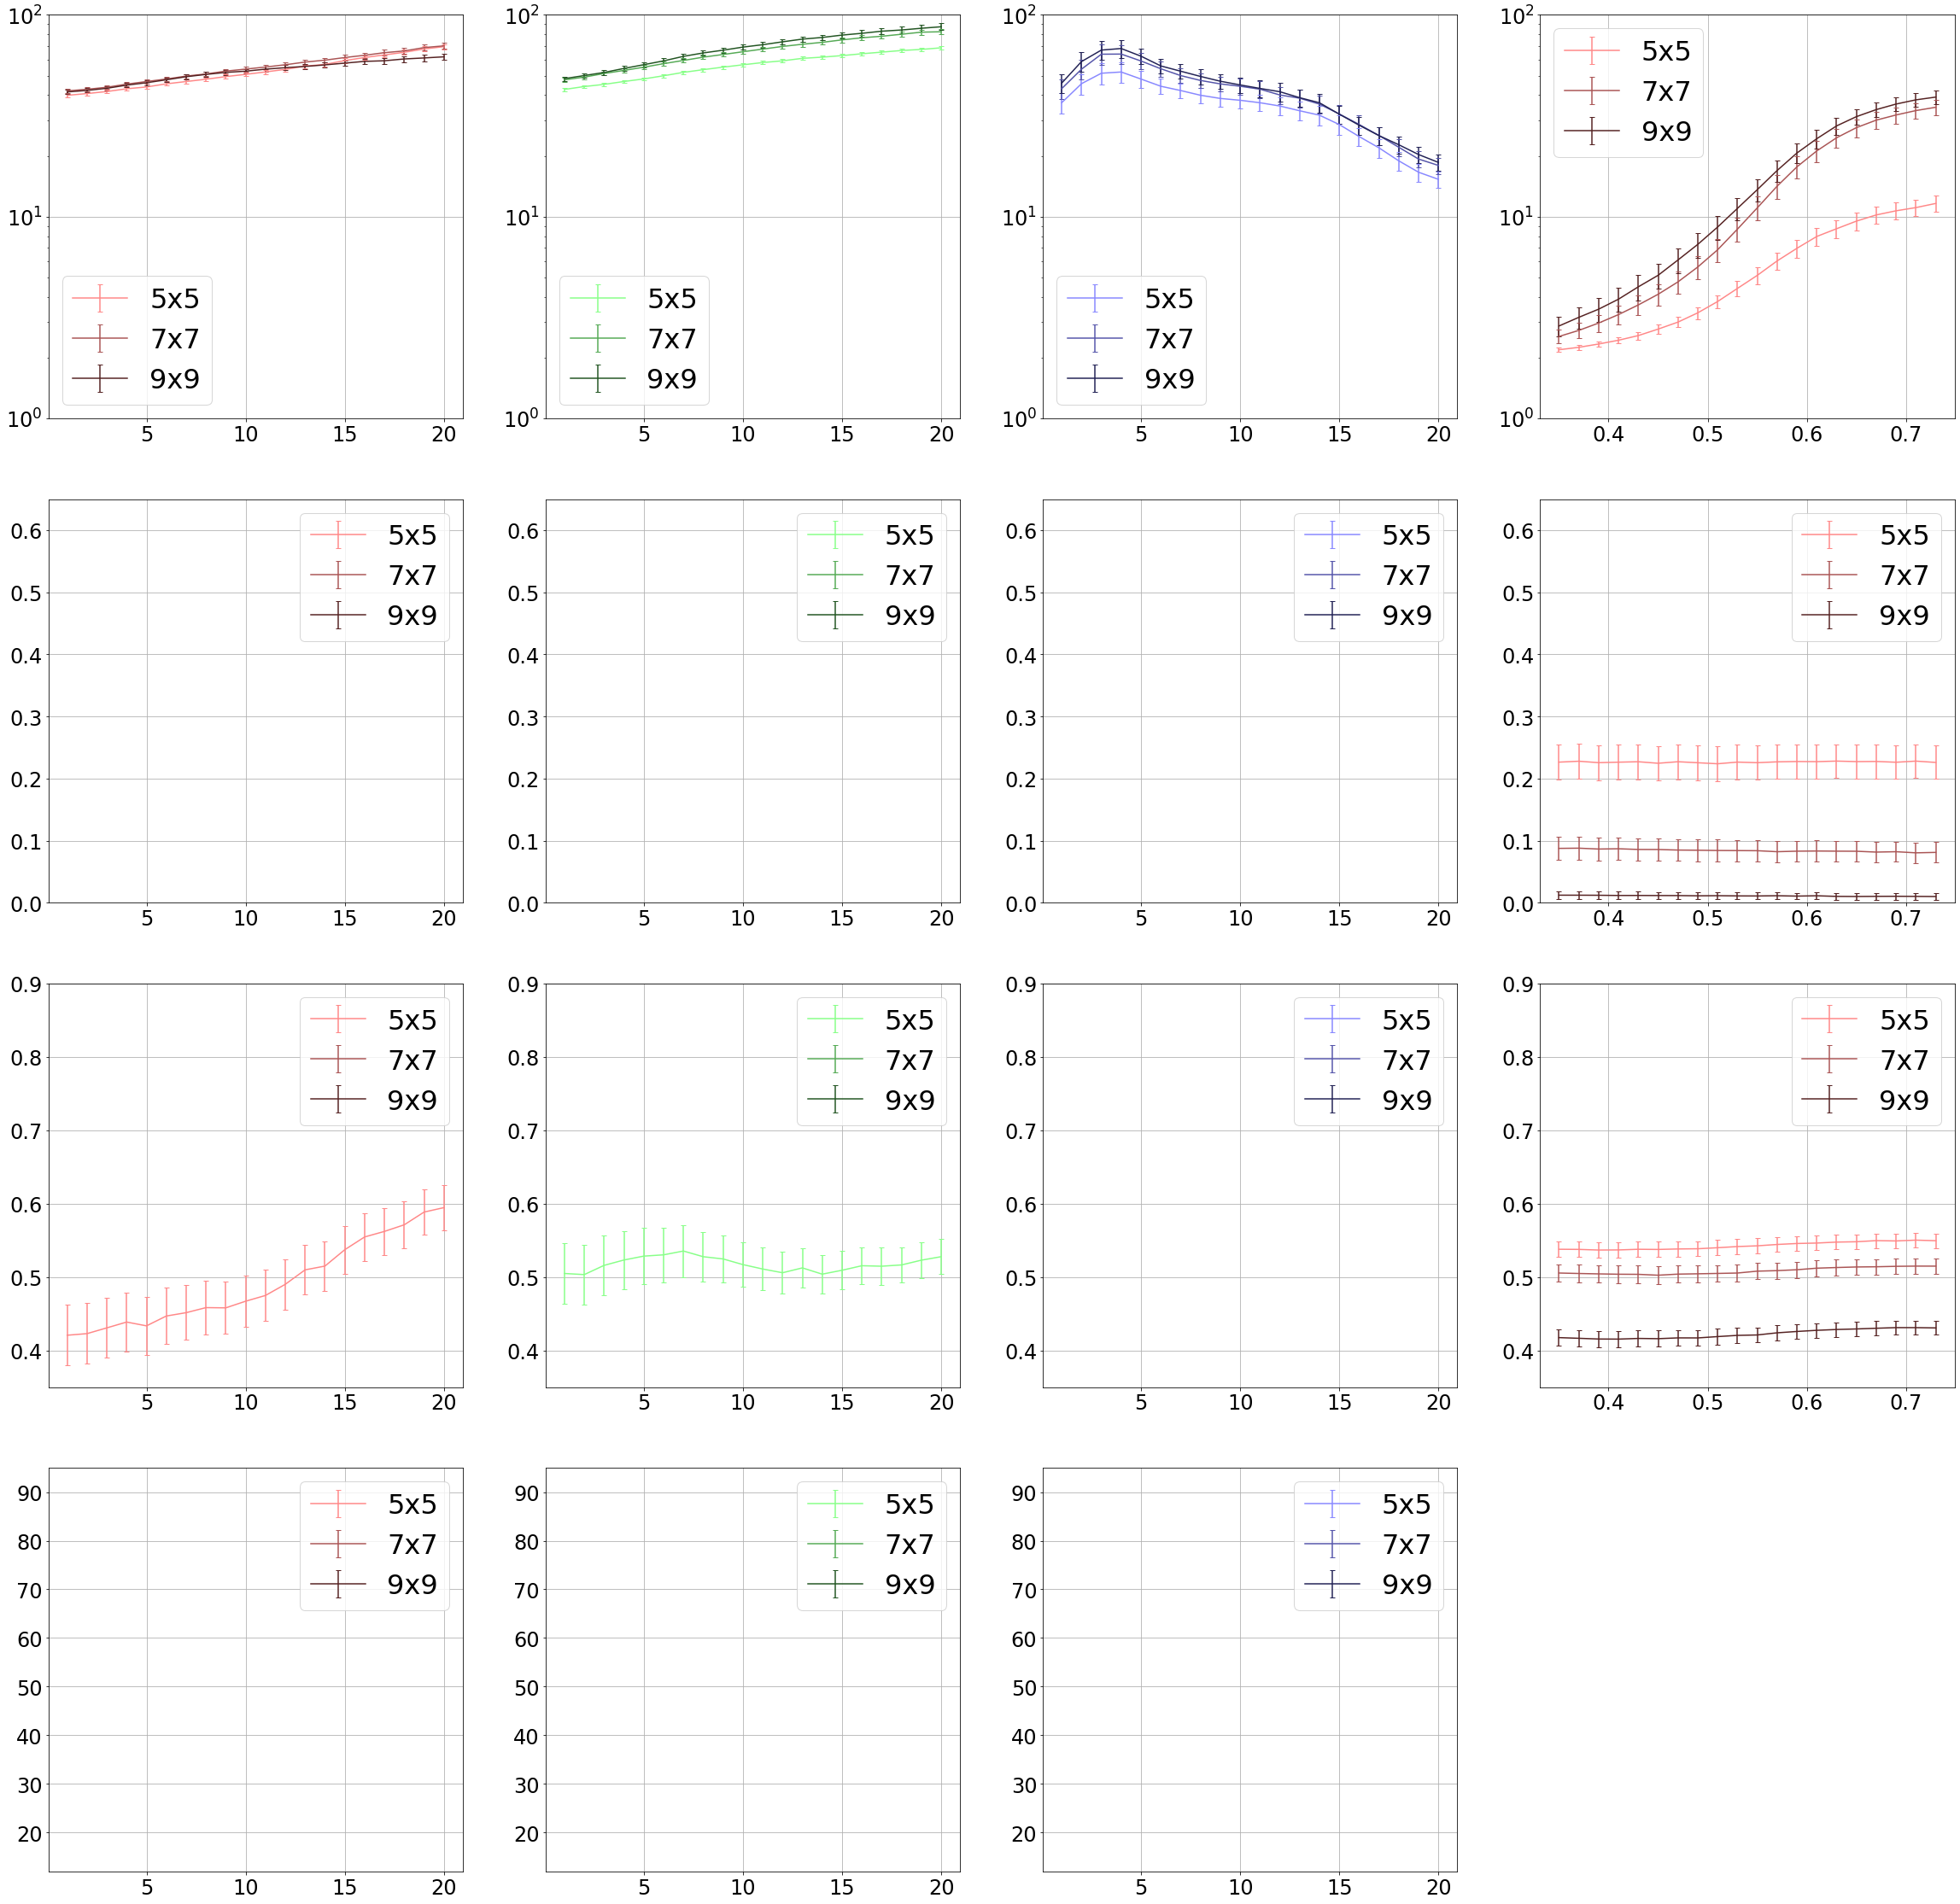

In [21]:
display(fig)

In [22]:
csv_names = [
             i_11_11,
             i_9_9,
             i_7_7,
             b_11_11,
             b_9_9,
             b_7_7,
             r_11_11,
             r_9_9,
             r_7_7]
map_sizes = [1, 2, 3, 1, 2, 3, 1, 2, 3]
model_numbers = [3, 3, 3, 2, 2, 2, 1, 1, 1]

df = pd.DataFrame(index=[])
for csv_name, map_size, model_number in zip(csv_names, map_sizes, model_numbers):
    df = df.append(LoadCsvWithMapSizeAndModelNumber(csv_name, map_size, model_number))
df = df.drop(columns=['entropy', 'probability', 'path', 'map_no'])

In [23]:
df_r = df[df['mode_number'] == 1].drop(columns=['mode_number'])
df_b = df[df['mode_number'] == 2].drop(columns=['mode_number'])
df_i = df[df['mode_number'] == 3].drop(columns=['mode_number'])

In [24]:
df_r.to_csv('dfo_r.csv')
df_b.to_csv('dfo_b.csv')
df_i.to_csv('dfo_i.csv')